In [1]:
# Import the pandas library as pd
import pandas as pd
import matplotlib.pyplot as plt

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('../datasets/police.csv')
# create a date time column.
ri['stop_datetime'] =  pd.to_datetime(ri.stop_date + ' ' + ri.stop_time)
# set the date time as an index.
ri.set_index('stop_datetime', inplace=True)

# Examine the head of the DataFrame
print(ri.head())

                    state   stop_date stop_time  county_name driver_gender  \
stop_datetime                                                                
2005-01-04 12:55:00    RI  2005-01-04     12:55          NaN             M   
2005-01-23 23:15:00    RI  2005-01-23     23:15          NaN             M   
2005-02-17 04:15:00    RI  2005-02-17     04:15          NaN             M   
2005-02-20 17:15:00    RI  2005-02-20     17:15          NaN             M   
2005-02-24 01:20:00    RI  2005-02-24     01:20          NaN             F   

                    driver_race                   violation_raw  violation  \
stop_datetime                                                                
2005-01-04 12:55:00       White  Equipment/Inspection Violation  Equipment   
2005-01-23 23:15:00       White                        Speeding   Speeding   
2005-02-17 04:15:00       White                        Speeding   Speeding   
2005-02-20 17:15:00       White                Call for Service

# Exploring the weather dataset

### Plotting the temperature

Let's examine the temperature columns from the weather dataset to assess whether the data seems trustworthy. First printing the summary statistics, and then visualizeing the data using a box plot.

When deciding whether the values seem reasonable, i'll keep in mind that the temperature is measured in degrees Fahrenheit, not Celsius!

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


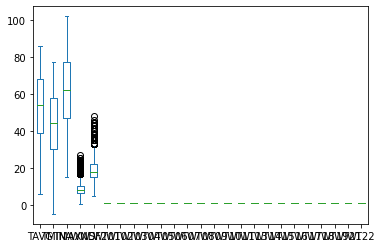

In [2]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv("../datasets/weather.csv")

# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather.plot(kind='box')

# Display the plot
plt.show()

### Plotting the temperature difference

Let's continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


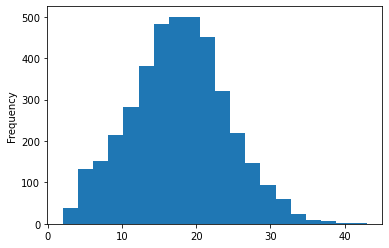

In [3]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

# Display the plot
plt.show()

# Categorizing the weather

### Counting bad weather conditions

The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

    WT05 indicates "Hail"
    WT11 indicates "High or damaging winds"
    WT17 indicates "Freezing rain"

For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

Let's quantify "how bad" the weather was each day by counting the number of 1 values in each row.

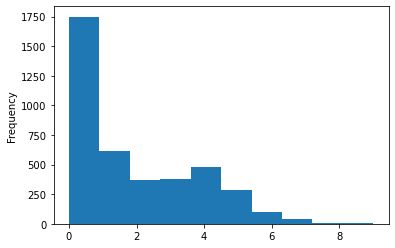

In [5]:
# Copy all rows and columns 'WT01' through 'WT22' to a new DataFrame using pandas slicing.
WT = weather.loc[:, 'WT01':'WT22'] # Ex. df.loc[row_start:row_end, col_start:col_end]

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

### Rating the weather conditions

The counts range from 0 to 9, and should be converted to ratings as follows:

    Convert 0 to 'good'
    Convert 1 through 4 to 'bad'
    Convert 5 through 9 to 'worse'


In [6]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad',
           2:'bad', 3:'bad',
           4:'bad', 5:'worse',
           6:'worse', 7:'worse',
           8:'worse', 9:'worse'
           }

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


### Changing the data type to category

Since the rating column only has a few possible values, you'll change its data type to category in order to store the data more efficiently. You'll also specify a logical order for the categories.

In [12]:
# import categorical data type.
from pandas.api.types import CategoricalDtype

# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# create categorical datatype
cat_dtype = CategoricalDtype(categories=cats, ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cat_dtype)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


# Merging datasets

### Preparing the DataFrames

Lets' prepare the traffic stop and weather rating DataFrames so that they're ready to be merged:

    With the ri DataFrame, you'll move the stop_datetime index to a column since the index will be lost during the merge.
    With the weather DataFrame, you'll select the DATE and rating columns and put them in a new DataFrame.


In [13]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

        stop_datetime state   stop_date stop_time  county_name driver_gender  \
0 2005-01-04 12:55:00    RI  2005-01-04     12:55          NaN             M   
1 2005-01-23 23:15:00    RI  2005-01-23     23:15          NaN             M   
2 2005-02-17 04:15:00    RI  2005-02-17     04:15          NaN             M   
3 2005-02-20 17:15:00    RI  2005-02-20     17:15          NaN             M   
4 2005-02-24 01:20:00    RI  2005-02-24     01:20          NaN             F   

  driver_race                   violation_raw  violation  search_conducted  \
0       White  Equipment/Inspection Violation  Equipment             False   
1       White                        Speeding   Speeding             False   
2       White                        Speeding   Speeding             False   
3       White                Call for Service      Other             False   
4       White                        Speeding   Speeding             False   

  search_type   stop_outcome is_arrested stop_dura

### Merging the DataFrames

Lets' merge the ri and weather_rating DataFrames into a new DataFrame, ri_weather.

The DataFrames will be joined using the stop_date column from ri and the DATE column from weather_rating. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, we'll set stop_datetime as the index, which is the column you saved in the previous exercise.

In [14]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(91741, 16)
(91741, 18)


# Does weather affect the arrest rate?

### Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Let's find out!

    First, you'll calculate the overall arrest rate.
    Then, you'll calculate the arrest rate for each of the weather ratings you previously assigned.
    Finally, you'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, good < bad < worse, they will be sorted that way in the results.

In [16]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.03556777868937704


In [17]:
# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

rating
good     0.033712
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


In [18]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

violation            rating
Equipment            good      0.058995
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076923
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013404
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


### Selecting from a multi-indexed Series

The output of a single .groupby() operation on multiple columns is a Series with a MultiIndex. Working with this type of object is similar to working with a DataFrame:

    The outer index level is like the DataFrame rows.
    The inner index level is like the DataFrame columns.

In [19]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation','bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            good      0.058995
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076923
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013404
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64
0.05804964058049641
rating
good     0.013404
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


### Reshaping the arrest rate data

Lets' reshape the arrest_rate Series into a DataFrame. This is a useful step when working with any multi-indexed Series, since it enables you to access the full range of DataFrame methods. Then create the exact same DataFrame using a pivot table. This is a great example of how pandas often gives you more than one way to reach the same result!

In [20]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='driver_gender', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.058995  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076923  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013404  0.013314  0.016886
driver_gender               F         M
violation                              
Equipment            0.067573  0.064133
Moving violation     0.065125  0.056114
Other                0.114569  0.072934
Registration/plates  0.087121  0.093691
Seat belt            0.022491  0.027217
Speeding             0.006391  0.017177
